In [1]:
import sys
import os
# Get the absolute path to the project directory
project_dir = os.path.abspath("..")

# Append the project directory to sys.path
if project_dir not in sys.path:
    sys.path.append(project_dir)
    
from src.predictionModule.LoadupSamples import LoadupSamples

import pandas as pd
import numpy as np
import polars as pl
import datetime
import seaborn as sns
import lightgbm as lgb
import random
import matplotlib.pyplot as plt
import logging
import time
import re

In [2]:
df = pl.read_parquet("./notebook-analysis_df_28jul25_1341.parquet")

In [3]:
out =  (
    df.sort("mean_pred")
      .with_columns(
          tail_mean_return = (
              pl.col("mean_return").cum_sum(reverse=True) /
              pl.arange(1, pl.len() + 1).reverse()
          )
      )
)

In [4]:
out2 =  (
    df.sort("end_train_date")
      .with_columns(
          tail_pred_return = (
              pl.col("mean_pred").cum_sum(reverse=True) /
              pl.arange(1, pl.len() + 1).reverse()
          )
      )
)

In [5]:
out3 =  (
    df.sort("end_train_date")
      .with_columns(
          tail_pred_return = (
              pl.col("mean_return").cum_sum(reverse=True) /
              pl.arange(1, pl.len() + 1).reverse()
          )
      )
)

In [6]:
out4 =  (
    df.sort("end_train_date")
      .with_columns(
          roll_mean_return = pl.col("mean_return").rolling_mean(window_size=40, min_samples=1, center=False)
          )# Adjust window size as needed
)

In [7]:
out5 = (
    df.filter(pl.col("mean_pred") > pl.quantile("mean_pred", 0.3))
    .sort("end_train_date")
    .with_columns(
        roll_mean_return = pl.col("mean_return").rolling_mean(window_size=10, min_samples=1, center=False)
    )# Adjust window size as needed
)

print(df.filter(pl.col("mean_pred") > pl.quantile("mean_pred", 0.3)).select("mean_return").mean())

shape: (1, 1)
┌─────────────┐
│ mean_return │
│ ---         │
│ f64         │
╞═════════════╡
│ 1.019995    │
└─────────────┘


(array([19967., 19981., 19997., 20011., 20028., 20042., 20058., 20072.,
        20089., 20103.]),
 [Text(19967.0, 0, '2024-09-01'),
  Text(19981.0, 0, '2024-09-15'),
  Text(19997.0, 0, '2024-10-01'),
  Text(20011.0, 0, '2024-10-15'),
  Text(20028.0, 0, '2024-11-01'),
  Text(20042.0, 0, '2024-11-15'),
  Text(20058.0, 0, '2024-12-01'),
  Text(20072.0, 0, '2024-12-15'),
  Text(20089.0, 0, '2025-01-01'),
  Text(20103.0, 0, '2025-01-15')])

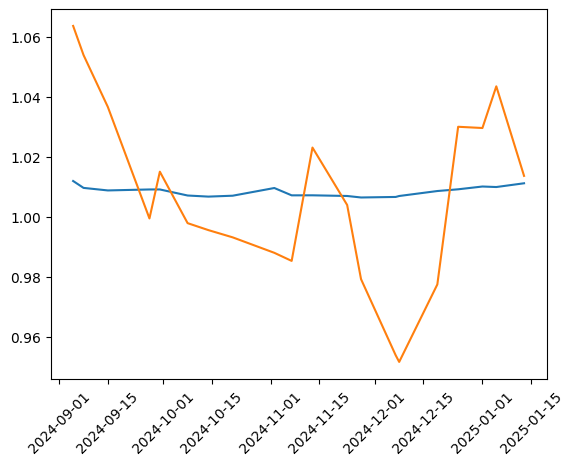

In [8]:
plt.plot(df['end_train_date'], df["mean_pred"], label="Mean Pred")
plt.plot(df['end_train_date'], (df["mean_return"]), label="Mean Return")
#plt.plot(df['end_train_date'], (df["mean_return"]-df["mean_return"].mean())/10 + df["mean_return"].mean(), label="Mean Return")
plt.xticks(rotation=45)